# EP Full Text Library: A Primer

Note: The EP Full Text data collection is commonly referred to as **EPAB**. In this document and in the code, all references to **EPAB** thus are synonymous with **EP Full Text**.

## Setup

### Import the library module

In [1]:
from epo.tipdata.epab import EPABClient

### Instantiate the EPAB client object


**Note**

As reported by the client instantiation output below, by default you will be working with a **test database**.

It's recommended to use it during the whole development phase, as it is way faster to test your code. You can switch anytime to the complete database (called 'PROD') without needing to apply any change to your code.

In [2]:
epab = EPABClient()

This client instance is currently configured to use a test dataset with reduced number of publications (~10K).
Use EPABClient(env='PROD') to use the complete EPAB dataset (>7M publications).
Use EPABClient(env='TEST') to use the test dataset and avoid displaying this warning



## Show and get help on the Database schema 

EP Full Text is organized following the **OBT** (One Big Table) design approach: Basically the whole data are contained in a single table, wherein 
- **each row corresponds to a unique publication**
- a publication is univocally identified by the combination of country code + publication number + kind code + date of publication. A specific key field called `epab_doc_id` has been created for this purpose.
- structured fields are defined using *nested* structures (called `RECORD`)
- fields having multiple occurrences are basically a *list* (labelled as `REPEATED` in the database schema)


The following method displays a navigable tree-like widget describing in full depth the schema of the EP Full Text table at all levels of hierarchy.


In [3]:
epab.fields()

WidDatabaseFields(header='', input_data={'': [{'name': 'epab_doc_id', 'type': 'STRING', 'mode': 'REQUIRED', 'd…

## Querying EP Full Text

EP Full Text library introduces a core `query` object which implements a specific query to the the database. 

The basic features of the `query` object can be summarized in the following:  
- The library offers a rich set of **predefined methods** (all starting with `query_`) which create `query` objects for the vast majority of the database fields.  
- Different `query` objects can be combined together using **boolean operators** as to build up more complex queries.
- A `query` object can be called (directly or using the `len` operator) to obtain the number of matching record in the EP Full Text table.
- To actually retrieve the results of the query (i.e. a certain set of fields), a specific set of `get_` **data retrieval methods** have been created (the main one is `get_results`)
- While this approcach covers a significant amount of practical cases, there can be of course complex or corner-case situations where it not efficient or simply it doesn't manage to build the wished query. For such situations, user can of course always directly query the EP Full Text table using **standard SQL**. 

In the following sections we will provide sections with examples covering each of the above points.

## Predefined `query` builder methods 

### Publication

#### Single method providing a combination of multiple attributes

Note, in EP Full Text all publications are European (i.e. `country` field is always `EP`). For this reason there is no need of a query method for such field. 

In [4]:
q = epab.query_publication(number="41%", kind_code="A1,A2", language="FR, DE", date="20180101-20230101")

In [5]:
print(q)
q.get_results("publication")

2 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            4105731               A1         20221221   
1                  EP            4104934               A1         20221221   

  publication.language  
0                   FR  
1                   DE

Of course, for the most frequently used fields, we also provide atomic methods

#### Kind Code

In [6]:
q = epab.query_publication_kind_code("A8")
print(q)
q.get_results("publication.kind, publication.number", limit=5)

271 publications


publication.kind publication.number
0               A8            3269261
1               A8            3290859
2               A8            3312895
3               A8            3333552
4               A8            3333983

#### Publication language

In [7]:
q = epab.query_publication_language("FR,DE")
print(q)
q.get_results("publication, ipc", limit=5)

3269 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            0909870               A1         19990421   
1                  EP            0547696               B1         19990421   
2                  EP            0909234               A1         19990421   
3                  EP            0489369               B2         19990421   
4                  EP            0909660               A1         19990421   

  publication.language                                                ipc  
0                   FR  [{'version': '6', 'symbol': 'E21B17/046', 'cat...  
1                   FR  [{'version': '6', 'symbol': 'H04N1/40', 'categ...  
2                   DE  [{'version': '8', 'symbol': 'B29C67/00', 'cate...  
3                   DE  [{'version': '6', 'symbol': 'F27D15/02', 'cate...  
4                   DE  [{'version': '6', 'symbol': 'B42F5/00', 'categ...

#### Publication date

You can request a single precise date using the format `YYYYMMDD`

Remember, all dates are strings in EP Full Text (this might change in future)  

In [8]:
q = epab.query_publication_date("20100602")
print(q)
q.get_results("publication", limit=5)

16 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            1391481               B1         20100602   
1                  EP            1978796               B1         20100602   
2                  EP            2190419               A1         20100602   
3                  EP            1225174               B2         20100602   
4                  EP            1790653               A3         20100602   

  publication.language  
0                   EN  
1                   EN  
2                   EN  
3                   EN  
4                   EN

Date is a string, so you can use **truncation** to get a range (e.g. a whole year or month) 

In [9]:
q = epab.query_publication_date("2021%")
print(q)
q.get_results("publication", limit=5)

283 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            3345157               B8         20210106   
1                  EP            2906587               B9         20210106   
2                  EP            3600865               B1         20210106   
3                  EP            3409788               B1         20210106   
4                  EP            3545920               B1         20210106   

  publication.language  
0                   EN  
1                   EN  
2                   EN  
3                   EN  
4                   DE

Finally, it is also possible to use a date range (format `YYYYMMDD-YYYYMMDD` to select a specific range of dates) 

In [10]:
q = epab.query_publication_date("20210115-20210125")
print(q)
q.get_results("publication", limit=5)

6 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            3765426               A1         20210120   
1                  EP            3766876               A1         20210120   
2                  EP            3680249               A3         20210120   
3                  EP            3765493               A2         20210120   
4                  EP            3767212               A1         20210120   

  publication.language  
0                   DE  
1                   EN  
2                   EN  
3                   EN  
4                   EN

### Application

#### Single method combining multiple attributes

In [11]:
q = epab.query_application(number="167%", date="20160401-20160430")
print(q)
q.get_results("application", limit=5)

6 publications


application.number application.filing_date
0         16725195.8                20160422
1         16741220.4                20160414
2         16747431.1                20160414
3         16718890.3                20160422
4         16726677.4                20160407

#### Application Number

In [12]:
q = epab.query_application_number("167%")
print(q)
q.get_results("application, inventor, applicant", limit=5)

44 publications


application.number application.filing_date  \
0         16753815.6                20160518   
1         16723939.1                20160520   
2         16761134.2                20160309   
3         16725195.8                20160422   
4         16738186.2                20160713   

                                            inventor  \
0  [{'name': 'NESPOR, Radek', 'address': 'Zdislav...   
1  [{'name': 'KRUMMA, Harry', 'address': 'Karlstr...   
2  [{'name': 'CAPARRÓS CASCO, Jordi', 'address': ...   
3  [{'name': 'SAVCHENKO, Ivan', 'address': '7-37-...   
4  [{'name': 'DEVOGELAERE, Benoit', 'address': '9...   

                                           applicant  
0  [{'name': 'COMPEX, spol. s r.o.', 'address': '...  
1  [{'name': 'Dürr Systems AG', 'address': 'Carl-...  
2  [{'name': 'Martí Coma, Lorena', 'address': 'Av...  
3  [{'name': 'Romanenko, Ruslan', 'address': '7-3...  
4  [{'name': 'Agilent Technologies Belgium NV', '...

#### Filing date

In [13]:
q = epab.query_application_filing_date("20160128-20160129")
print(q)
q.get_results("publication.number, application.number, application.filing_date", limit=5)

4 publications


publication.number application.number application.filing_date
0            3408103         16704059.1                20160129
1            3250538         16707269.3                20160128
2            3256427         16702330.8                20160129
3            3261343         16751905.7                20160128

### Inventor

#### Inventor name

**Note** A string-search is always implemented with the `LIKE` SQL operator, and by default a `%` is added at the beginning and at the end of each requested string. 

Thus in the example below, specifying "Michael" or "%Michael%" is substantially identical. 
If you want to match the string only the beginning or the end of the inventor name, you can override this rule by specifying e.g. "Michael%" or "%Michael"

**Note** also that Inventor field is a **list**, therefore the above string "Michael" is matched over **all inventor names** of a certain publication 

In [14]:
q = epab.query_inventor_name("Michael")
print(q)
q.get_results("publication, inventor", limit=5)

413 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            0000091               A1         19781220   
1                  EP            0001217               A2         19790404   
2                  EP            0011670               A3         19800820   
3                  EP            0023105               A1         19810128   
4                  EP            0030092               A1         19810610   

  publication.language                                           inventor  
0                   EN  [{'name': 'Debenham, Michael', 'address': '111...  
1                   DE  [{'name': 'Michaelis, Peter, Dr.', 'address': ...  
2                   EN  [{'name': 'Vogel, Emanuel, Prof.Dr.', 'address...  
3                   EN  [{'name': 'Hampshire, Michael John', 'address'...  
4                   EN  [{'name': 'Yellin, Tobias Oregon', 'address': ...

By default a string-search is case insensitive, but this can be changed using the `ignore_case` flag 

In [15]:
q = epab.query_inventor_name("%Mi%", ignore_case=False)
print(q)
q.get_results("publication, inventor", limit=5)

1131 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            0000091               A1         19781220   
1                  EP            0001217               A2         19790404   
2                  EP            0004814               A1         19791017   
3                  EP            0005161               A3         19791128   
4                  EP            0007157               A2         19800123   

  publication.language                                           inventor  
0                   EN  [{'name': 'Debenham, Michael', 'address': '111...  
1                   DE  [{'name': 'Michaelis, Peter, Dr.', 'address': ...  
2                   FR  [{'name': 'Archer, Michel', 'address': '55, Av...  
3                   EN  [{'name': 'Marton, Miksa', 'address': '', 'cit...  
4                   EN  [{'name': 'Clark, Graeme Milbourne', 'address'...

By default, you can search for multiple strings within the list of inventor names of a certain publication (i.e. logical "OR" within the array). 

However, setting the `match_all` flag to `True`, you can request that a given list of strings are all present inside the list of inventors of a certain publication.  


In [16]:
q = epab.query_inventor_name(["Michael", 'Strobel'], ignore_case=False, match_all=True)
print(q)
q.get_results("publication, inventor", limit=5)

1 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            3299768               A1         20180328   

  publication.language                                           inventor  
0                   DE  [{'name': 'Strobel, Michael', 'address': 'Am R...

For inventor `address` , `city` and `country` the mechanism is the same as for `name`. In the following we will see some examples, where we will also start experimenting with the different parameters of the `get_results` method

#### Inventor city

In [17]:
q = epab.query_inventor_city("%Boston%")
print(q)
q.get_results("inventor.city", output_type="list", limit=5)

25 publications


[{'inventor': [{'city': 'Boston, MA 02116'},
   {'city': 'Framingham, MA 01701'},
   {'city': 'Brookline, MA 02146'}]},
 {'inventor': [{'city': 'Malden, Massachusetts 02148'},
   {'city': 'Shanghai 201203'},
   {'city': 'Shanghai 201203'},
   {'city': 'Boston, Massachusetts 02114'},
   {'city': 'Princeton, New Jersey 08540'}]},
 {'inventor': [{'city': 'Tamilnadu\nPollachi 642002'},
   {'city': 'Boston\nMassachusetts 02130'},
   {'city': 'CH-1010 Lausanne'},
   {'city': 'Lake Oswego\nOregon 02130'}]},
 {'inventor': [{'city': 'Boston, MA 02113'},
   {'city': 'Milton, MA 02186'},
   {'city': 'Quincy, MA 02169'},
   {'city': 'Swampscott, MA 01907'},
   {'city': 'Franklin, MA 02038'},
   {'city': 'Allston, MA 02134'},
   {'city': 'Westford, MA 01886'},
   {'city': 'Sanford, ME 04073'},
   {'city': 'Pembroke, MA 02359'}]},
 {'inventor': [{'city': 'Boston, MA 02215'},
   {'city': 'Greenville, SC 29607'},
   {'city': 'Boston, MA 02108'},
   {'city': 'Jamaica Plain, MA 02130'},
   {'city': 'Som

#### Inventor country

In [18]:
q = epab.query_inventor_country("EN, DE")
print(q)
q.get_results("publication, inventor.country, inventor.address", limit=5)

2091 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            0909234               A1         19990421   
1                  EP            0489369               B2         19990421   
2                  EP            0909340               A1         19990421   
3                  EP            0911815               A1         19990428   
4                  EP            0912411               A1         19990506   

  publication.language                                           inventor  
0                   DE  [{'country': 'DE', 'address': 'Holzbauerstrass...  
1                   DE  [{'country': 'DE', 'address': 'Luxemburgstrass...  
2                   DE  [{'country': 'DE', 'address': 'Hohenbachernstr...  
3                   DE  [{'country': 'DE', 'address': 'Dr.-Hermann-Bru...  
4                   DE     [{'country': 'DE', 'address': 'Moitzfeld 72'}]

#### Inventor street

In [19]:
q = epab.query_inventor_street ("Moitzfeld%")
print(q)
q.get_results("publication, inventor", output_type="list")

1 publications


[{'publication': {'country': 'EP',
   'number': '0912411',
   'kind': 'A1',
   'date': '19990506',
   'language': 'DE'},
  'inventor': [{'name': 'GEORGIADIS, Robert, Guido',
    'address': 'Moitzfeld 72',
    'city': 'D-51429 Bergisch Gladbach',
    'country': 'DE'}]}]

### Applicant

Methods for querying Applicant's name, address, city and country are substantially the same as for the inventor.

Here we will see just a simple of examples

In [20]:
q = epab.query_applicant_country("LT")
print(q)
q.get_results("publication, applicant.country", limit=5)

3 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            1865077               A1         20071212   
1                  EP            3883463               A2         20210929   
2                  EP            4087373               A1         20221109   

  publication.language                               applicant  
0                   DE                     [{'country': 'LT'}]  
1                   EN  [{'country': 'LT'}, {'country': 'LT'}]  
2                   EN                     [{'country': 'LT'}]

### Representative

Also for representative, the methods follow the same logic as for the inventor and applicant.

However **note** that differently than applicant and inventor, representative is **not** a list but a structured field

In [21]:
q = epab.query_representative_name("%Haseltine%")
print(q)
q.get_results("publication.language, representative", limit=5)

9 publications


publication.language         representative.name  \
0                   EN  Haseltine Lake Kempner LLP   
1                   EN  Haseltine Lake Kempner LLP   
2                   EN  Haseltine Lake Kempner LLP   
3                   EN  Haseltine Lake Kempner LLP   
4                   EN  Haseltine Lake Kempner LLP   

                        representative.address representative.city  \
0  Lincoln House, 5th Floor \n300 High Holborn     London WC1V 7JH   
1          Redcliff Quay \n120 Redcliff Street     Bristol BS1 6HU   
2          Redcliff Quay \n120 Redcliff Street     Bristol BS1 6HU   
3          Redcliff Quay \n120 Redcliff Street     Bristol BS1 6HU   
4          Redcliff Quay \n120 Redcliff Street     Bristol BS1 6HU   

  representative.country  
0                     GB  
1                     GB  
2                     GB  
3                     GB  
4                     GB

### IPC classification

For IPC we just have one single combined `query_ipc` method with some ad-hoc specific flags. Let's see them with multiple examples.  

Let's look for all the publications having at least one of two possible IPC symbols assigned 

#### Symbol

In [22]:
q = epab.query_ipc(symbol="H04W36%, H04L12%")
print(q)
q.get_results("ipc.symbol", output_type="list", limit=5)

102 publications


[{'ipc': [{'symbol': 'H04M3/00'},
   {'symbol': 'H04L12/56'},
   {'symbol': 'H04Q11/04'}]},
 {'ipc': [{'symbol': 'H04N1/40'},
   {'symbol': 'H04L25/00'},
   {'symbol': 'H04L12/00'},
   {'symbol': 'H04N7/24'}]},
 {'ipc': [{'symbol': 'H04W36/14'}]},
 {'ipc': [{'symbol': 'H04L12/64'}, {'symbol': 'H04J3/06'}]},
 {'ipc': [{'symbol': 'H04L12/40'}]}]

We can also find all publications having *all* IPC symbols present, using the match_all parameter

In [23]:
q = epab.query_ipc(symbol=["H04W36%", "H04L12%"], match_all=True)
print(q)
q.get_results("ipc.symbol", output_type="list", limit=5)

3 publications


[{'ipc': [{'symbol': 'H04L12/28'},
   {'symbol': 'H04L12/56'},
   {'symbol': 'H04W36/00'}]},
 {'ipc': [{'symbol': 'H04L29/06'},
   {'symbol': 'H04L12/28'},
   {'symbol': 'H04W36/14'},
   {'symbol': 'H04W36/00'}]},
 {'ipc': [{'symbol': 'H04W36/00'},
   {'symbol': 'H04W76/02'},
   {'symbol': 'H04L12/24'}]}]

Let's also limit a query to IPC-8 version (also called IPCR) 

#### IPC version

In [24]:
q = epab.query_ipc(symbol=["H04W36/00", "H04L12/56"], ipc8_only=True)
print(q)
q.get_results("ipc.symbol, ipc.version", output_type="list", limit=5)

25 publications


[{'ipc': [{'symbol': 'H04W24/02', 'version': '8'},
   {'symbol': 'H04W36/14', 'version': '8'},
   {'symbol': 'H04W36/00', 'version': '8'},
   {'symbol': 'H04W48/18', 'version': '8'}]},
 {'ipc': [{'symbol': 'H04L5/00', 'version': '8'},
   {'symbol': 'H04W24/10', 'version': '8'},
   {'symbol': 'H04W28/06', 'version': '8'},
   {'symbol': 'H04W28/18', 'version': '8'},
   {'symbol': 'H04W48/16', 'version': '8'},
   {'symbol': 'H04W72/02', 'version': '8'},
   {'symbol': 'H04W72/04', 'version': '8'},
   {'symbol': 'H04W36/00', 'version': '8'}]},
 {'ipc': [{'symbol': 'H04W36/00', 'version': '8'}]},
 {'ipc': [{'symbol': 'H04W36/14', 'version': '8'},
   {'symbol': 'H04W84/12', 'version': '8'},
   {'symbol': 'H04W88/06', 'version': '8'},
   {'symbol': 'H04W36/00', 'version': '8'}]},
 {'ipc': [{'symbol': 'H04L29/12', 'version': '8'},
   {'symbol': 'H04W40/02', 'version': '8'},
   {'symbol': 'H04W40/36', 'version': '8'},
   {'symbol': 'H04W36/00', 'version': '8'}]}]

Let's now query for two symbols which should be both present and assigned as "invention" symbols

#### Symbol category

In [25]:
q = epab.query_ipc(symbol="H04W36/00, H04L12%", match_all=True, invention=True, ipc8_only=True)
print(q)
q.get_results("ipc.symbol, ipc.category", output_type="list", limit=5)

3 publications


[{'ipc': [{'symbol': 'H04L12/28', 'category': 'Inv'},
   {'symbol': 'H04L12/56', 'category': 'Inv'},
   {'symbol': 'H04W36/00', 'category': 'Inv'}]},
 {'ipc': [{'symbol': 'H04L29/06', 'category': 'Inv'},
   {'symbol': 'H04L12/28', 'category': 'Inv'},
   {'symbol': 'H04W36/14', 'category': 'Inv'},
   {'symbol': 'H04W36/00', 'category': 'Inv'}]},
 {'ipc': [{'symbol': 'H04W36/00', 'category': 'Inv'},
   {'symbol': 'H04W76/02', 'category': 'Inv'},
   {'symbol': 'H04L12/24', 'category': 'Inv'}]}]

### CPC classification

CPC works very similarly to IPC (with some obvious differencer related to the specific classification type). 

Les's see a couple of simple examples:

In [26]:
q = epab.query_cpc(symbol="H04L69%, H04L12%", match_all=True)
print(q)
q.get_results("cpc.symbol", output_type="list", limit=5)

1 publications


[{'cpc': [{'symbol': 'H04L12/2856'},
   {'symbol': 'H04L12/4633'},
   {'symbol': 'H04L45/04'},
   {'symbol': 'H04L61/6004'},
   {'symbol': 'H04L67/10'},
   {'symbol': 'H04L69/08'}]}]

In [27]:
q = epab.query_cpc(symbol="H04L5/0007, H04L5/0064", match_all=True, invention=False)
print(q)
q.get_results("cpc.symbol, cpc.category", output_type="list", limit=5)

1 publications


[{'cpc': [{'symbol': 'H04L1/18', 'category': 'Add'},
   {'symbol': 'H04L5/0007', 'category': 'Add'},
   {'symbol': 'H04L5/0053', 'category': 'Inv'},
   {'symbol': 'H04L5/0064', 'category': 'Add'},
   {'symbol': 'H04L5/0091', 'category': 'Inv'},
   {'symbol': 'H04W36/0055', 'category': 'Inv'},
   {'symbol': 'H04W72/00', 'category': 'Add'},
   {'symbol': 'H04W72/042', 'category': 'Add'},
   {'symbol': 'H04W36/0033', 'category': 'Inv'}]}]

### CSets

CSets are a special type of additional CPC classification. It consists of a "list of lists" of CPC symbols assigned to a publication. 
Querying CSets is therefore different than querying CPC classification. 

#### Match any of a set of symbols
In this first example, we will request that **any** of a set of symbols is present in the CSets of a certain publication

In [28]:
symbols = ['H01L2224/73204', 'H01L2224/32225', 'H01L2224/05599']
q = epab.query_csets(symbol=symbols, match_all=False)
print(q)
results = q.get_results("csets", output_type="list")

3 publications


To reduce verbose output, let's write a simple method to identify and print the matches

In [29]:
def print_cset_matches(results, symbols):
    for result_idx, result in enumerate(results): 
        print(f"Result number {result_idx}")
        for cset_idx, cset in enumerate(result["csets"]): 
            for symbol_idx, symbol in enumerate(cset["cset"]):
                if symbol["symbol"] in symbols: 
                    print(f'Found symbol {symbol["symbol"]} in position {symbol_idx} of cset number {cset_idx}')
        print("===")

In [30]:
print_cset_matches(results, symbols)

Result number 0
Found symbol H01L2224/32225 in position 1 of cset number 8
===
Result number 1
Found symbol H01L2224/73204 in position 0 of cset number 4
Found symbol H01L2224/32225 in position 2 of cset number 4
===
Result number 2
Found symbol H01L2224/73204 in position 0 of cset number 0
Found symbol H01L2224/32225 in position 2 of cset number 0
===


#### Match all of a set of symbols anywhere 

In this second example we use the `match_all` flag to force the query to match **all** the given symbols anywhere in a csets

In [31]:
symbols = ['H01L2224/83101', 'H01L2224/27332']
q = epab.query_csets(symbol=symbols, match_all=True)
print(q)
results = q.get_results("csets", output_type="list")
print_cset_matches(results, symbols)

1 publications
Result number 0
Found symbol H01L2224/83101 in position 0 of cset number 0
Found symbol H01L2224/27332 in position 0 of cset number 2
===


#### Match all of a set of symbols within a CSet

Finally, we will use the `match_in_cset` flag to force to find all the given symbols precisely in (at least) one cset of the publication 

In [32]:
symbols = ['H01L2224/73204', 'H01L2224/32225']
q = epab.query_csets(symbol=symbols, match_in_cset=True)
print(q)
results = q.get_results("csets", output_type="list")
print_cset_matches(results, symbols)

2 publications
Result number 0
Found symbol H01L2224/73204 in position 0 of cset number 4
Found symbol H01L2224/32225 in position 2 of cset number 4
===
Result number 1
Found symbol H01L2224/73204 in position 0 of cset number 0
Found symbol H01L2224/32225 in position 2 of cset number 0
===


### Divisional

#### Divisional Application number

In [33]:
q = epab.query_divisional_application_number("92%")
print(q)
q.get_results("divisional", limit=5)

28 publications


divisional
0  [{'application_number': '92112939.1', 'publica...
1  [{'application_number': '86102365.3', 'publica...
2  [{'application_number': '92106010.9', 'publica...
3  [{'application_number': '92200198.7', 'publica...
4  [{'application_number': '92101250.6', 'publica...

#### Divisional date

In [34]:
q = epab.query_divisional_date(date="20180101-20230101")
print(q)
q.get_results("divisional", limit=5)

134 publications


divisional
0  [{'application_number': '18151071.0', 'publica...
1  [{'application_number': '18163186.2', 'publica...
2  [{'application_number': '11001274.7', 'publica...
3  [{'application_number': '18165357.7', 'publica...
4  [{'application_number': '18167909.3', 'publica...

#### Divisional Publication number

In [35]:
q = epab.query_divisional_publication_number("04%")
print(q)
q.get_results("divisional", limit=5)

37 publications


divisional
0  [{'application_number': '91200356.3', 'publica...
1  [{'application_number': '92106010.9', 'publica...
2  [{'application_number': '92200198.7', 'publica...
3  [{'application_number': '92101250.6', 'publica...
4  [{'application_number': '90200489.4', 'publica...

### Parent

#### Parent Application Number

In [36]:
q = epab.query_parent_application_number("92%")
print(q)
q.get_results("parent", limit=5)

12 publications


parent
0  [{'application_number': '92121073.8', 'publica...
1  [{'application_number': '92113841.8', 'publica...
2  [{'application_number': '92913343.7', 'publica...
3  [{'application_number': '07100187.9', 'publica...
4  [{'application_number': '92925406.8', 'publica...

#### Parent Application date

In [37]:
q = epab.query_parent_date(date="20180101-20230101")
print(q)
q.get_results("parent", limit=5)

78 publications


parent
0  [{'application_number': '18728002.9', 'publica...
1  [{'application_number': '18164955.9', 'publica...
2  [{'application_number': '18156418.8', 'publica...
3  [{'application_number': '18157128.2', 'publica...
4  [{'application_number': '18184826.8', 'publica...

#### Parent Publication Number

In [38]:
q = epab.query_parent_publication_number("04%")
print(q)
q.get_results("parent", limit=5)

7 publications


parent
0  [{'application_number': '91107549.7', 'publica...
1  [{'application_number': '91301912.1', 'publica...
2  [{'application_number': '89904237.8', 'publica...
3  [{'application_number': '89908678.9', 'publica...
4  [{'application_number': '05014676.0', 'publica...

### Search Report attributes

Search report information come with a set of attributes which can be querie in a combined way using a single `query_search_report` method. 
The attributes are: 
- `ipc`:  The technical field identified in the search (IPC symbols)
- `date`: The date of the search report
- `is_no_unity` boolean flag: Whether the search report refers to a unitary or non-unitary invention  
- `is_incomplete_search` boolean flag: Whether the search report is partial
  
Let's see how it works with one simple example, where we look for all publications whise search report refers to a non-unitary applications narrowed within a certain technical area (given symbols must all have been assigned by the search Examiner)

In [39]:
q = epab.query_search_report(ipc=["B08", "B01"], is_no_unity=True, match_all=True)
print(q)
q.get_results("search_report", limit=5)

1 publications


search_report.date                            search_report.ipc_field  \
0           20200702  [E02F, B08B, B07B, B01D, E21B, B65G, F16L, F16...   

   search_report.is_no_unity  search_report.is_incomplete_search  \
0                       True                               False   

   search_report.is_no_search  
0                       False

### Search report citations

#### citation attributes

It is possible to search in the list of documents cited in the search report using a single combined method called `query_srep_citation`. 

The specific characteristics that can be queried are specified by the following parameters: 
- `document`: A string or a list of strings to be matched in the citation (document) name
- `is_patent`: A boolean flag for filtering in/out only citations which are patents
- `category`: filter by the type of citation (X/Y/A etc.)

Here are a couple of self-explanatory examples: 

In [40]:
q = epab.query_srep_citation(document=['EP', 'WO'], is_patent=True, match_all=True)
print(q)
q.get_results('srep_citation', limit=4)

276 publications


srep_citation
0  [{'is_patent': True, 'document': 'WO 9102078 A...
1  [{'is_patent': False, 'document': 'SOLTANI SOR...
2  [{'is_patent': True, 'document': 'US 200923185...
3  [{'is_patent': True, 'document': 'US 201603139...

In [41]:
q = epab.query_srep_citation(document=['EP', 'WO'], category='XY', match_all=True)
print(q)
q.get_results('srep_citation', limit=3)

191 publications


srep_citation
0  [{'is_patent': True, 'document': 'WO 9102078 A...
1  [{'is_patent': False, 'document': 'SIERRO SOPH...
2  [{'is_patent': True, 'document': 'US 200923185...

#### query the citation in original XML

To perform a more accurate query in the document sometimes the above attributes may be not enough. For this purpose, there is also a method called `query_srep_citation_document_xml` which allows to query directly the original ST.36 XML formatted document name (this allows for advanced specific queries) 

In [42]:
q = epab.query_srep_citation_document_xml(document_xml='<country', category='XY', match_all=True, is_patent=True)
print(q)
q.get_results('srep_citation', limit=4)

896 publications


srep_citation
0  [{'is_patent': True, 'document': 'US 200812459...
1  [{'is_patent': True, 'document': 'US 2940917 A...
2  [{'is_patent': False, 'document': 'BENNETT P J...
3  [{'is_patent': True, 'document': 'DE 102004006...

### Prior Art

The method `query_prior_art` offers a simple mechanism for searching in the prior art citations made during examination.
In addition to searching for strings in the document, it is also possible to restrict to patent/non-patent ones. 

In [43]:
q = epab.query_prior_art(document='EP')
print(q)
q.get_results('prior_art', limit=4)

1832 publications


prior_art
0  [{'is_patent': True, 'document': 'FR-2 325 658...
1  [{'is_patent': True, 'document': 'US-3 065 125...
2  [{'is_patent': True, 'document': 'FR-2 254 677...
3  [{'is_patent': True, 'document': 'DE-1 542 950...

In [44]:
q = epab.query_prior_art(document='EP', is_patent=False)
print(q)
q.get_results('prior_art', limit=4)

534 publications


prior_art
0  [{'is_patent': True, 'document': 'EP 0049742 A...
1  [{'is_patent': True, 'document': 'EP 0229701 A...
2  [{'is_patent': True, 'document': 'EP 0258868 A...
3  [{'is_patent': True, 'document': 'EP 0384392 A...

In [45]:
q = epab.query_prior_art(document=['EP', 'WO'])
print(q)
q.get_results('prior_art', limit=4)

2353 publications


prior_art
0  [{'is_patent': True, 'document': 'EP 0433808 A...
1  [{'is_patent': True, 'document': 'EP 0620703 A...
2  [{'is_patent': True, 'document': 'WO 0062782 A...
3  [{'is_patent': True, 'document': 'WO 9212730 A...

In [46]:
q = epab.query_prior_art(document=['EP', 'WO'], match_all=True)
print(q)
q.get_results('prior_art', limit=4)

914 publications


prior_art
0  [{'is_patent': True, 'document': 'EP 0433808 A...
1  [{'is_patent': True, 'document': 'WO 0062782 A...
2  [{'is_patent': True, 'document': 'WO 9212730 A...
3  [{'is_patent': True, 'document': 'WO 0066753 A...

### Reference

The method `query_reference` allows to query all the citations made by the applicant in the description. 

It allows to search for one or more strings in the cited document (*any/all* as usual through `match_all` flag) and also to restrict to patents/non-patents only.

Here a few examples

In [47]:
q = epab.query_reference(document=['EP', 'WO'])
print(q)
q.get_results('reference', limit=4)

1844 publications


reference
0  [{'is_patent': True, 'document': 'US 2819186 A...
1  [{'is_patent': True, 'document': 'DE 3831448',...
2  [{'is_patent': True, 'document': 'US PS5158090...
3  [{'is_patent': True, 'document': 'WO 95023165 ...

In [48]:
q = epab.query_reference(document=['EP', 'WO'], match_all=True)
print(q)
q.get_results('reference', limit=4)

732 publications


reference
0  [{'is_patent': True, 'document': 'US 6303352 B...
1  [{'is_patent': True, 'document': 'EP 567514 C'...
2  [{'is_patent': True, 'document': 'WO 02083067 ...
3  [{'is_patent': True, 'document': 'EP 0268956 A...

In [49]:
q = epab.query_reference(document=['EP', 'WO'], match_all=True, is_patent=False)
print(q)
q.get_results('reference', limit=4)

190 publications


reference
0  [{'is_patent': True, 'document': 'WO 0170818 A...
1  [{'is_patent': True, 'document': 'US 200301185...
2  [{'is_patent': True, 'document': 'US 7501552 B...
3  [{'is_patent': True, 'document': 'WO 02059351 ...

To perform a more accurate query in the document sometimes the above attributes may be not enough. For this purpose, there is also a method called `query_srep_citation_document_xml` which allows to query directly the original ST.36 XML formatted document name (this allows for advanced specific queries) 

In [50]:
q = epab.query_reference_document_xml(document_xml="<country")
print(q)
q.get_results('reference', limit=4)

2748 publications


reference
0  [{'is_patent': True, 'document': 'JP 200008682...
1  [{'is_patent': True, 'document': 'US 52098717 ...
2  [{'is_patent': True, 'document': 'US 4062848 A...
3  [{'is_patent': True, 'document': 'US 2337197 A...

In [51]:
q = epab.query_abstract_language("en")
print(q)
q.get_results("abstract", limit=5)

3111 publications


abstract.language                                      abstract.text
0                EN  <p id="pa01" num="0001">A push-in pressure rel...
1                EN  <p id="pa01" num="0001">Modified phenolic resi...
2                EN  <p id="pa01" num="0001">Cyclopropyl carboxylat...
3                EN  <p id="pa01" num="0001">Apparatus for opening ...
4                EN  <p id="pa01" num="0001">An apparatus for elimi...

In [52]:
q = epab.query_description_language("en")
print(q)
q.get_results("description", limit=5)

4951 publications


description.language                                   description.text
0                   EN  <p id="p0001" num="0001">This invention relate...
1                   EN  <p id="p0001" num="0001">This invention is con...
2                   EN  <p id="p0001" num="0001">This invention relate...
3                   EN  <heading id="h0001">Technical Field</heading><...
4                   EN  <p id="p0001" num="0001">This invention relate...

In [53]:
q = epab.query_claims_language("en")
print(q)
q.get_results("claims", limit=5)

5911 publications


claims
0  [{'language': 'DE', 'text': '<claim id="c-de-0...
1  [{'language': 'FR', 'text': '<claim id="c-fr-0...
2  [{'language': 'EN', 'text': '<claim id="c-en-0...
3  [{'language': 'EN', 'text': '<claim id="c-en-0...
4  [{'language': 'DE', 'text': '<claim id="c-de-0...

### Designated States

For the designated states ther eis a single combined method which allows to filter by one or more of the different types of designation: 
- contracting
- extension
- validation

As usual, the given states can be matched with "OR" (any of them matching) or "AND" (all of them must be matching within a field)


In [54]:
q = epab.query_designated_states(contracting="ES, IT", extension="AL")
print(q)
q.get_results("designated_states", limit=5)

1438 publications


designated_states.contracting  \
0  [AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, F...   
1  [AT, BE, CH, CY, DE, DK, ES, FI, FR, GB, GR, I...   
2  [AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, F...   
3  [AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, F...   
4  [AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, F...   

  designated_states.extension designated_states.validation  
0            [AL, BA, MK, RS]                           []  
1    [AL, LT, LV, MK, RO, SI]                           []  
2            [AL, BA, MK, RS]                           []  
3        [AL, HR, LT, LV, MK]                           []  
4        [AL, BA, HR, MK, RS]                           []

### Titles

Titles are present in EP Full Text in all three official EPO languages (English, German and French) and stored in three dedicated fields. 

They can be easily queried using a combined method called `query_title`, which allows to filter by language and ioffers the usual string-search parameters (`ignore_case`, `match_all`).

Let's see a few examples. 

In [55]:
q = epab.query_title(text="covid, corona virus, coronavirus", language="EN", ignore_case=True)
print(q)
q.get_results("title.en, applicant.name, applicant.country", output_type="list", limit=5)

3 publications


[{'title': {'en': 'GDF-15 FOR PREDICTING THE DISEASE SEVERITY OF A PATIENT WITH COVID-19'},
  'applicant': [{'name': 'F. Hoffmann-La Roche AG', 'country': 'CH'},
   {'name': 'Roche Diagnostics GmbH', 'country': 'DE'}]},
 {'title': {'en': 'CORONA VIRUS VACCINE'},
  'applicant': [{'name': 'Immunor AS', 'country': 'NO'}]},
 {'title': {'en': 'CANNABIDIOL FOR AUGMENTING VACCINE MEDIATED IMMUNITY AND PROPHYLAXIS OF COVID-19'},
  'applicant': [{'name': 'Akseera Pharma Corp.', 'country': 'CA'},
   {'name': 'Patel, Manit', 'country': 'CA'},
   {'name': 'Merchant, Shreema', 'country': 'CA'}]}]

In [56]:
# We can also look for having multiple terms in the same title
q = epab.query_title(text="impfstoff, virus", match_all=True, language="DE", ignore_case=True)
print(q)
q.get_results("title.de, applicant", output_type="list", limit=5)

4 publications


[{'title': {'de': 'MODIFIZIERTE VARIANTE DES VACCINIA ANKARA VIRUS ALS IMPFSTOFF FÜR NEUGEBORENE'},
  'applicant': [{'name': 'Bavarian Nordic A/S',
    'address': 'Hejreskovvej 10 A',
    'city': '3490 Kvistgård',
    'country': 'DK'}]},
 {'title': {'de': 'IMPFSTOFFE GEGEN PAPILLOMA VIRUS'},
  'applicant': [{'name': 'THE UNIVERSITY OF QUEENSLAND',
    'address': '',
    'city': 'St Lucia, QLD 4072',
    'country': 'AU'},
   {'name': 'CLS LIMITED',
    'address': '45 Poplar Road',
    'city': 'Parkville, VIC 3052',
    'country': 'AU'}]},
 {'title': {'de': 'Impfstoffe basierend auf Mutanten des Virus der infektiösen Bursal-Krankheit'},
  'applicant': [{'name': 'Intervet International BV',
    'address': 'Wim de Körverstraat 35',
    'city': '5831 AN Boxmeer',
    'country': 'NL'}]},
 {'title': {'de': 'CORONAVIRUS-IMPFSTOFF'},
  'applicant': [{'name': 'Immunor AS',
    'address': 'Karenslyst Allé 6, 4th floor',
    'city': '0278 Oslo',
    'country': 'NO'}]}]

### Full-Text fields

The most important characteristic of the EP Full Text data collection is undoubtedly the fact that it also contains the **full text** fields, namely the **description** and **the claims**. Although it is not considered formally part of the full-text fields, we will consider here as such also the **abstract** field.

The characteristics common to all these three fields are that: 
- They all have a **language** attribute
- They are all formatted using xhtml, meaning that the field contains tags and it can be natively renderd by a browser. Furthermore, it also contains tags referencing embedded images (typically tables, formulas, equations) and also specific tags expressing as text the mathematical/chemical formulas

One important distinction however relates to the **claims** field, which different from abstract and description is a **list** of text. This because a publication can be published with claims in several language versions and also for different target countries. 

In the following we will see how it is possible to query in a very basic way the full-text fields. In future versions of the EP Full Text library, this specific functionalities will be further enhanced as to offer even more powerful search mechanisms.  

#### Language

It is possible to merely filter publications to those having one or more of a specified language in the abstract/description/claims. 

In [57]:
q = epab.query_abstract_language("en")
print(q)
q.get_results("abstract", limit=5)

3111 publications


abstract.language                                      abstract.text
0                EN  <p id="pa01" num="0001">A push-in pressure rel...
1                EN  <p id="pa01" num="0001">Modified phenolic resi...
2                EN  <p id="pa01" num="0001">Cyclopropyl carboxylat...
3                EN  <p id="pa01" num="0001">Apparatus for opening ...
4                EN  <p id="pa01" num="0001">An apparatus for elimi...

In [58]:
q = epab.query_description_language("FR")
print(q)
q.get_results("description", limit=2)

798 publications


description.language                                   description.text
0                   FR  <p id="p0001" num="0001">1 - Procédé pour la p...
1                   FR  <p id="p0001" num="0001">L'invention concerne ...

**Note** that for the claims the method merely looks whether there is at least one claim set within the publication's claims which is in the requested language(s).

In [59]:
q = epab.query_claims_language("en")
print(q)
q.get_results("claims", limit=5)

5911 publications


claims
0  [{'language': 'DE', 'text': '<claim id="c-de-0...
1  [{'language': 'FR', 'text': '<claim id="c-fr-0...
2  [{'language': 'EN', 'text': '<claim id="c-en-0...
3  [{'language': 'EN', 'text': '<claim id="c-en-0...
4  [{'language': 'DE', 'text': '<claim id="c-de-0...

#### Abstract

The methods for querying these fields are all very similar to the ones saw earlier for the titles
Let's see a simple example with the Abstract

In [60]:
q = epab.query_abstract(text="handover, base station", match_all=True, ignore_case=True)
print(q)
q.get_results("abstract", output_type="list", limit=2)

3 publications


[{'abstract': {'language': 'EN',
   'text': '<p id="pa01" num="0001">In a mobile radio network in which synchronous base stations and asynchronous base stations coexist, according to handover destination base station candidate information transmitted from a base station to a mobile station, effective time information indicating either an effective time during which it is guaranteed that a signal from a base station candidate included in the handover destination base station candidate information can be detected when, after a lapse of an integral multiple of a fixed time interval from a time when the mobile station could detect a reference signal which were transmitted at the fixed time intervals from the base station candidate, the mobile station detects the same base station candidate again, the effective time depending on the base station candidate, or an index for enabling the mobile station to drive the effective time is provided to the mobile station, and the mobile station carrie

Note that it is possible to also filter the language directly with these methods

In [61]:
q = epab.query_abstract(text="%mobile %, display", language='DE', match_all=True, ignore_case=True)
print(q)
q.get_results("abstract", output_type="list", limit=2)

1 publications


[{'abstract': {'language': 'DE',
   'text': '<p id="pa01" num="0001">Die Erfindung betrifft ein mobiles Displayteil zum Anzeigen von Informationen mit wenigstens einer reversibel beschreibbaren Displayoberfläche, insbesondere für ein Whiteboard, wobei das mobile Displayteil wenigstens eine Halteeinrichtung zum Anordnen an einem Gegenstand aufweist.</p>'}}]

#### Description 

Here an example of querying in the description

In [62]:
q = epab.query_description(text="handover, base station", match_all=True, ignore_case=True)
print(q)
q.get_results("description", limit=4)


47 publications


description.language                                   description.text
0                   EN  <heading id="h0001">Field of the Invention</he...
1                   EN  <p id="p0001" num="0001">The invention relates...
2                   EN  <heading id="h0001">TECHNICAL FIELD</heading><...
3                   EN  <heading id="h0001"><b><u>TECHNICAL FIELD</u><...

#### Claims

In [63]:
q = epab.query_claims(text="mobile", language="en", ignore_case=True, is_amended=False)
print(q)
q.get_results("claims", output_type="list", limit=2)

7 publications


[{'claims': [{'language': 'EN',
    'text': '<claim id="c-en-0001" num="0001"><claim-text>A near-field communication (NFC) system comprising:\n<claim-text>a plurality of geographically distributed NFC tags;</claim-text><claim-text>a tag geo-position database configured to store respective geographic positions of said NFC tags; and</claim-text><claim-text>a plurality of mobile wireless communications devices, each configured to<br/>\ncommunicate with a given NFC tag when in proximity thereto,<br/>\ndetermine a current geographic position of said mobile wireless communications device, and<br/>\ncommunicate the determined current geographic position of said mobile wireless communications device to update said tag geo-position database.</claim-text></claim-text></claim><claim id="c-en-0002" num="0002"><claim-text>The NFC system of Claim 1 wherein said tag geo-position database is configured to update the stored geographic position for said given NFC tag based upon a plurality of determined

## Combining queries together 

Each query basically identifies a set of publications. 
Therefore, queries can be combined together with boolean operators as to obtain: 

  - Intersection (logic *AND*): Using the `&` operator
  - Union (logic *OR*): Using the `|` operator
  - Exclusion (logic *AND NOT*): Using the `-` operator
  - Negation (logic *NOT*): Using the `~` operator

Let's see a few examples of how this allows to perform more complex (and complete) queries over the data set

### Intersection: The `&` operator 

Let's find all publication having specific combination of "Invention" and "Additional" IPC symbols

In [64]:
q1 = epab.query_ipc("H04W72/12%", invention=True)
q2 = epab.query_ipc("H04W72/04%", invention=False)
q3 = q1 & q2

print(q3)
q3.get_results("ipc.symbol, ipc.category", output_type="list")

2 publications


[{'ipc': [{'symbol': 'H04J11/00', 'category': 'Inv'},
   {'symbol': 'H04B7/06', 'category': 'Inv'},
   {'symbol': 'H04B7/12', 'category': 'Inv'},
   {'symbol': 'H04B7/26', 'category': 'Inv'},
   {'symbol': 'H04J4/00', 'category': 'Inv'},
   {'symbol': 'H04L5/00', 'category': 'Inv'},
   {'symbol': 'H04L27/26', 'category': 'Inv'},
   {'symbol': 'H04W52/42', 'category': 'Inv'},
   {'symbol': 'H04W72/12', 'category': 'Inv'},
   {'symbol': 'H04B7/0452', 'category': 'Add'},
   {'symbol': 'H04W72/04', 'category': 'Add'}]},
 {'ipc': [{'symbol': 'H04W72/12', 'category': 'Inv'},
   {'symbol': 'H04W24/00', 'category': 'Inv'},
   {'symbol': 'H04W28/00', 'category': 'Inv'},
   {'symbol': 'H04W48/00', 'category': 'Inv'},
   {'symbol': 'H04W72/04', 'category': 'Add'}]}]

Here is another example where we find all A2 publications filed as application after 2010

In [65]:
q1 = epab.query_publication_kind_code("A2")
q2 = epab.query_application_filing_date("20100101-20501231")
q3 = q1 & q2

print(q3)
q3.get_results("publication, application", limit=5)

267 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            3298916               A2         20180328   
1                  EP            3297766               A2         20180328   
2                  EP            3311789               A2         20180425   
3                  EP            3311132               A2         20180425   
4                  EP            3311901               A2         20180425   

  publication.language application.number application.filing_date  
0                   EN         18151624.6                20180115  
1                   DE         16723939.1                20160520  
2                   EN         17201553.9                20130515  
3                   EN         16725195.8                20160422  
4                   DE         17001658.8                20171009

### Exclusion: the `-` operator 

Let's now exclude from the result list all Publications in English or German language

In [66]:
q4 = q3 - epab.query_publication_language("EN,DE")

print(q4)
q4.get_results("publication, application", limit=5)

21 publications


publication.country publication.number publication.kind publication.date  \
0                  EP            2236897               A2         20101006   
1                  EP            2336832               A2         20110622   
2                  EP            2425714               A2         20120307   
3                  EP            2565343               A2         20130306   
4                  EP            2623446               A2         20130807   

  publication.language application.number application.filing_date  
0                   FR         10290122.0                20100310  
1                   FR         10405219.6                20101112  
2                   FR         11180331.8                20110907  
3                   FR         12175074.9                20120705  
4                   FR         13152997.6                20130129

### Merging results: The `|` operator 

Let's now find all publications having either a certain IPC code or a set of terms in the description, and published after 2020

In [67]:
q1 = epab.query_description("handover, channel", match_all=True)
q2 = epab.query_ipc("H04W36%")
q3 = epab.query_publication_date("20200101-20250101")
q4 = (q1 | q2) & q3

print(q4)
q4.get_results("title.en, ipc, publication.date", limit=5)

18 publications


title.en  \
0  ENB PDCCH IMPLEMENTATION TO AVOID AMBIGUOUS DC...   
1  SYSTEMS AND METHODS OF HANDING OVER A WIRELESS...   
2                  USER EQUIPMENT AND RELATED METHOD   
3  ACCESS POINT SWITCHING METHOD AND TERMINAL DEVICE   
4  METHOD AND SYSTEM FOR DYNAMICALLY VARYING REFE...   

                                                 ipc publication.date  
0  [{'version': '8', 'symbol': 'H04L5/00', 'categ...         20200401  
1  [{'version': '8', 'symbol': 'H04W36/00', 'cate...         20210106  
2  [{'version': '8', 'symbol': 'H04W36/02', 'cate...         20210317  
3  [{'version': '8', 'symbol': 'H04W36/14', 'cate...         20210616  
4  [{'version': '8', 'symbol': 'H04W52/32', 'cate...         20210616

## Retrieving data from a query

In all the previous examples we have used the `get_results` method to retrieve some specific fields and with a certain format. 

In this section we will explore better the possibilities offered by this method and we will also see all the additional facilities available for retrieving data. 

Let's first start creating a simple test query which will be used in the following examples

In [68]:
q = epab.query_publication_date("%1109")
q

35 publications

### The `get_results` method 

#### Selecting the fields

As seen in all the various examples, all database fields listed by the `fields()` method are available for retrieval, and will be returned according to such schema.<br>
In this way, the returned results are always consistent with a predefined model.  

The content of a structured (nested) record can be returned with all its fields, e.g. 

In [69]:
q.get_results("publication", output_type="list", limit=2)

[{'publication': {'country': 'EP',
   'number': '4086403',
   'kind': 'A1',
   'date': '20221109',
   'language': 'DE'}},
 {'publication': {'country': 'EP',
   'number': '4063540',
   'kind': 'A3',
   'date': '20221109',
   'language': 'EN'}}]

Alternatively, it is possible to explicitly request only some sub-fields. However the structure will be preserved, e.g. 

In [70]:
q.get_results("publication.kind, publication.language", output_type="list", limit=2)

[{'publication': {'kind': 'A1', 'language': 'DE'}},
 {'publication': {'kind': 'A3', 'language': 'EN'}}]

The fields list can be specified as comma-separated string (see above), or in a classical Python list:

In [71]:
q.get_results(["publication.kind", "publication.language"], output_type="list", limit=2)

[{'publication': {'kind': 'A1', 'language': 'DE'}},
 {'publication': {'kind': 'A3', 'language': 'EN'}}]

#### Retrieving supplementary publication data (drawings etc.)

In addition to regular database fields, it is possible to retrieve also supplementary data which is attached to the publication.<br>
A special field in the database called `attachment` provides the complete list of such data, which in short are: 

- The **Drawings** (*DRW*) accompaining the publication
- The images **embedded** (*EMB*) in the description, abstract and claims (often also called "inlines", they typically represent mathematical expressions, chemistry formulas and tables) 
- The fac-simile of the original **Search Report** (*SREP*). Note: This is a set of images. The database also stores text information extracted from the Search Report in the fields *search_report** and *srep_citation*
- The **Sequence Listing** (*SEQL*) files
- The **PDF** (*PDF*) version of the original publication
- Any **additional** (*ADD*) file accompaining the publication
- The source ST.36 **XML file** produced by the EPO and used for extracting all the database fields. It can be useful for extracting some information not (yet) available in the database


Let's explore how the attachments of a publication are retrieved: 

In [72]:
result = q.get_results(["publication.language, attachment"], output_type="list", limit=1)
result

[{'publication': {'language': 'DE',
   '_field_2': [{'category': 'DRW',
     'file_name': 'imgf0001.tif',
     'file_format': 'PNG',
     'drawing_id': 'f0001',
     'drawing_number': '1'},
    {'category': 'PDF',
     'file_name': 'EP09002919NWB2.pdf',
     'file_format': 'PDF',
     'drawing_id': None,
     'drawing_number': None},
    {'category': 'XML',
     'file_name': 'EP09002919NWB2.xml',
     'file_format': 'XML',
     'drawing_id': None,
     'drawing_number': None}],
   'attachment': [{'category': 'DRW',
     'file_name': 'imgf0001.tif',
     'file_format': 'PNG',
     'drawing_id': 'f0001',
     'drawing_number': '1'},
    {'category': 'PDF',
     'file_name': 'EP09002919NWB2.pdf',
     'file_format': 'PDF',
     'drawing_id': None,
     'drawing_number': None},
    {'category': 'XML',
     'file_name': 'EP09002919NWB2.xml',
     'file_format': 'XML',
     'drawing_id': None,
     'drawing_number': None}]}}]

To actually retrieve the content of one or more of the above attachments, the corresponding *category* can be specified in the **attachment** parameter of the get_results method. In this case it is not necessary to specify the `attachment` field, it will be automatically added.

**IMPORTANT NOTE:** This operation is very resource-intensive!! It can lead to high execution times and high memory consumption!! The reason is: All the attachment fields are stored in a separate storage system (in a Google Storage bucket) therefore their retrieval does not offer the same performances as the data retrieval from BigQuery. 


Let's see how the retrieval works in practice:

In [73]:
result = q.get_results(["publication.language"], attachment=["DRW", "PDF"], output_type="list", limit=1)

In this case, the **attachment** field is also automatically retrieved and the byte-content of the corresponding attachment is stored in a sub-field called **content**, i.e.

In [74]:
for entry in result[0]["attachment"]: 
    print(entry["file_name"], entry["category"])
    print("Content: ", entry.get("content", "Not retrieved")[:50])
    print()

imgf0001.tif DRW
Content:  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x9d\x00\x00\n&\x08\x00\x00\x00\x00\xef\xe9\xeap\x00\x00 \x00IDATx\x01\xec\xc1\x0bB*I\x02'

EP09002919NWB2.pdf PDF
Content:  b'%PDF-1.4\r%\xe2\xe3\xcf\xd3\r\n45 0 obj\n<</Linearized 1/L 243997/'



A simple mechanism for displaying e.g. the drawing is offered by ipython native libraries, e.g.

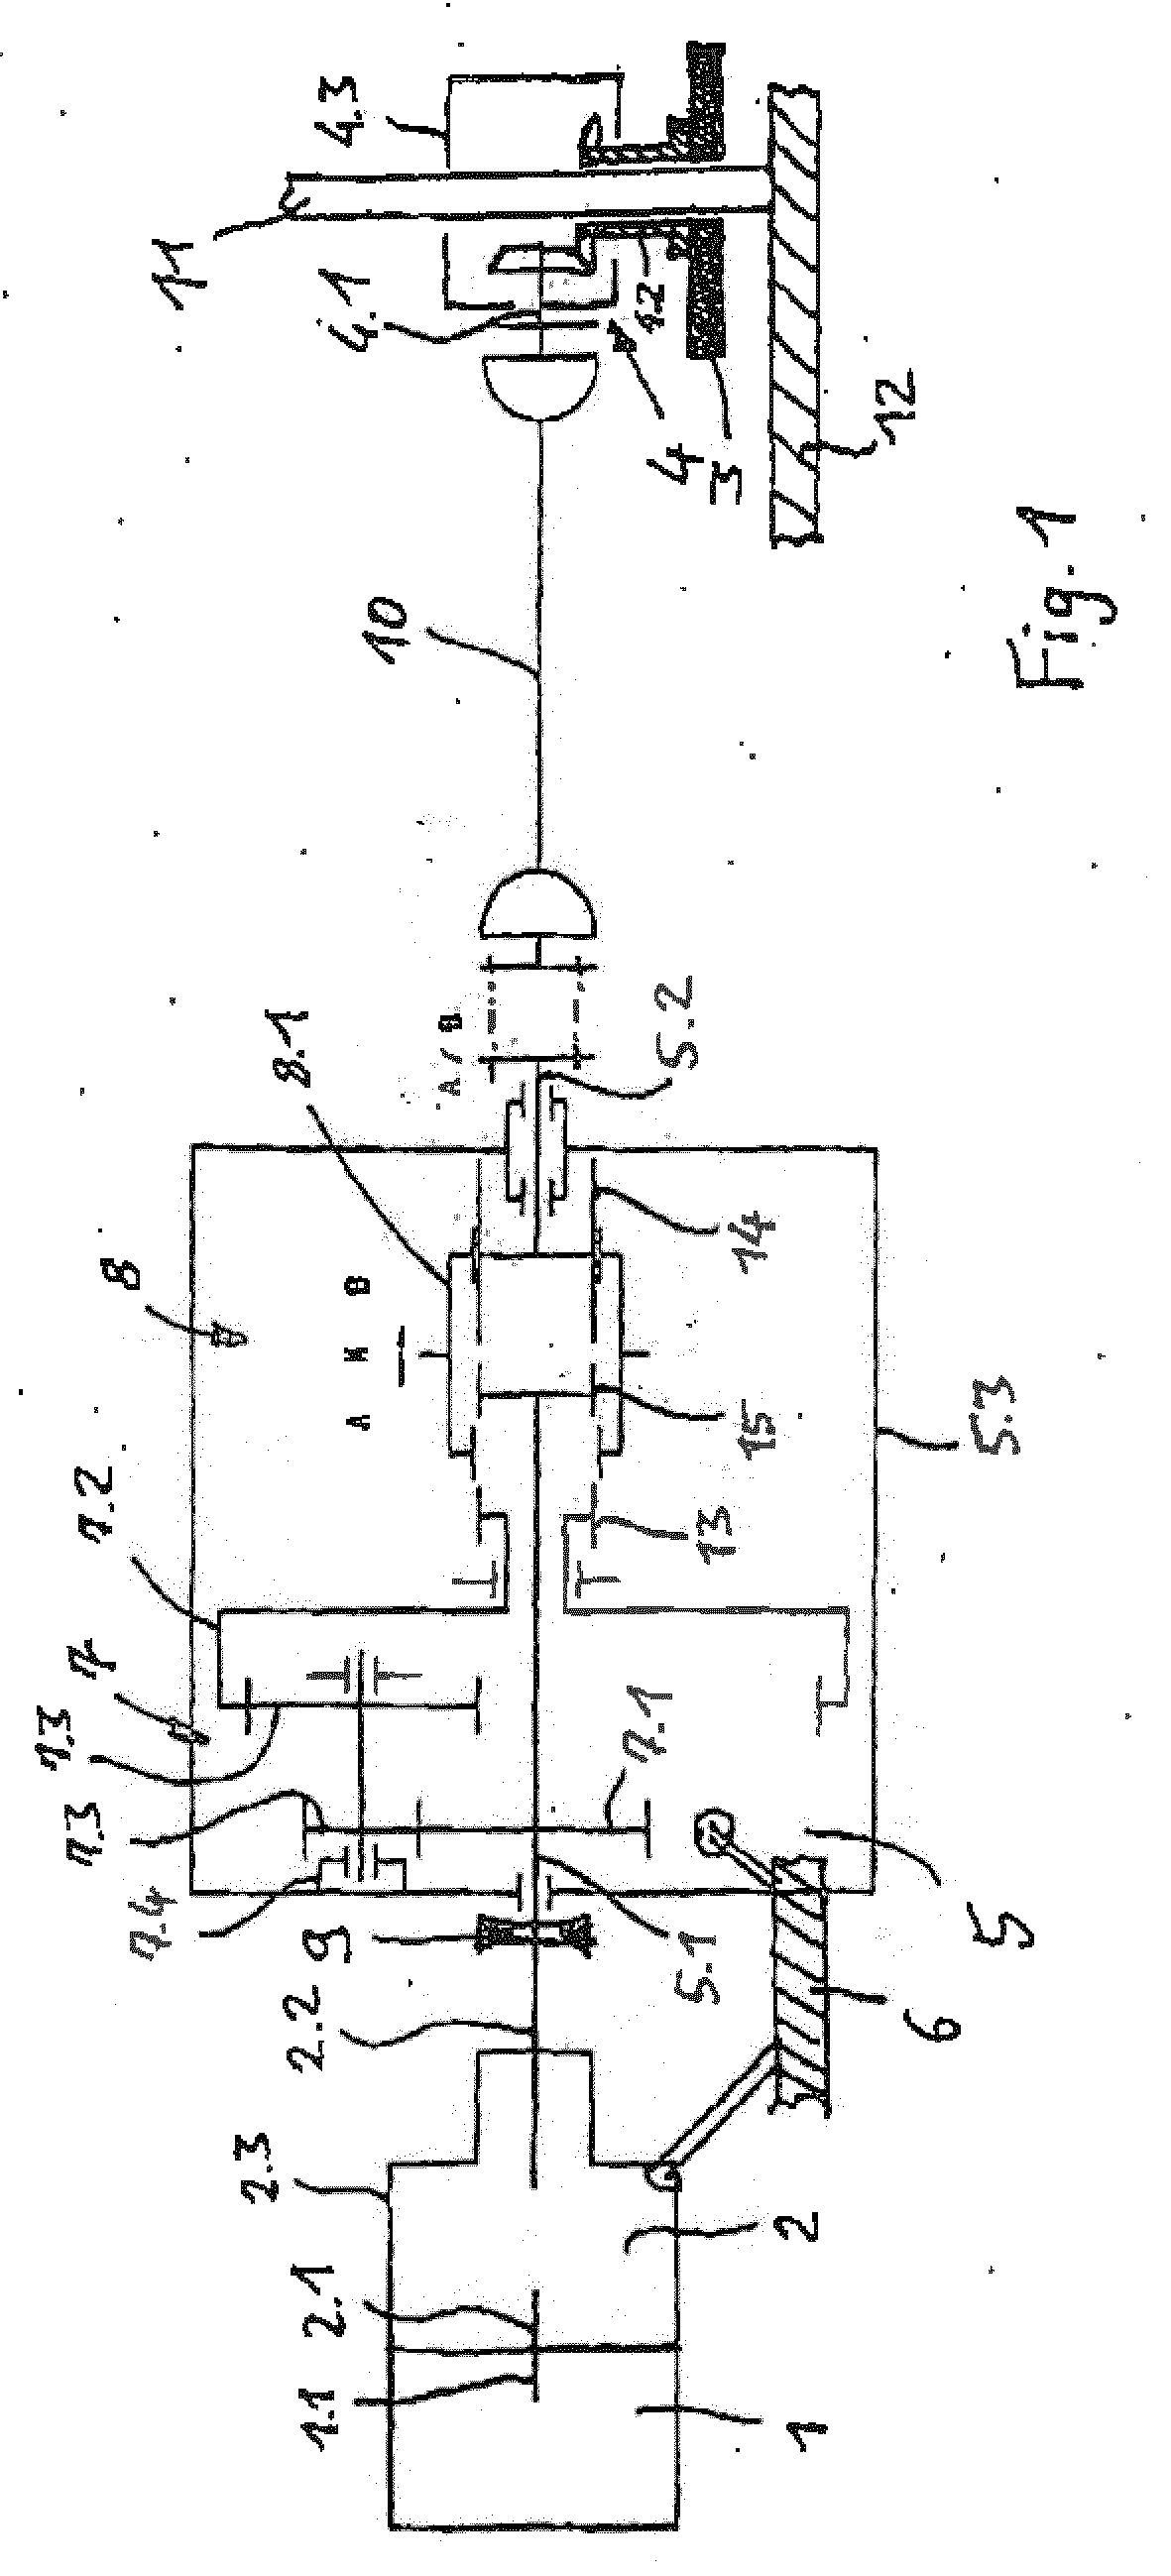

In [75]:
from IPython.display import display, Image

image = Image(result[0]["attachment"][0]["content"], width=300)
display(image)


In the coming sections we will see additional simplified mechanisms offered by the library to display and store the retrieved content 

### Predefined data retrieval methods

The `get_results` method is a general purpose method. However, in many common situations it is faster to use some predefined `get_` methods which provide directly the results. 

All these methods are basically just wrappers around the `get_results`.

#### The `epab_doc_id` key field

This method is ideal to retrieve the unique identifier of the resulting publications

In [76]:
q.get_epab_doc_id(output_type='list', limit=5)

[{'epab_doc_id': 'EP2098432B220161109'},
 {'epab_doc_id': 'EP3051185A820161109'},
 {'epab_doc_id': 'EP2708817B120161109'},
 {'epab_doc_id': 'EP2845000B920161109'},
 {'epab_doc_id': 'EP2499589B120161109'}]

#### All bibliographic fields

This methods returns all the bibliographic fields without the need to specify them. Note that due to the large number of fields, it can be quite 'heavy'.

In [77]:
q.get_biblio(limit=5)

epab_doc_id                                           title.de  \
0  EP2098432B220161109  Antriebsstrang für ein Kraftfahrzeug mit zwei ...   
1  EP3051185A820161109  HALTEDICHTUNGSMATERIAL, HERSTELLUNGSVERFAHREN ...   
2  EP2708817B120161109                        Herd mit einem Grillbrenner   
3  EP2845000B920161109                                  MEHRPHASENMESSUNG   
4  EP2499589B120161109  VERFAHREN UND SYSTEM FÜR PATIENTENSPEZIFISCHE ...   

                                            title.en  \
0  Powertrain for a motor vehicle with two drive ...   
1  HOLDING SEAL MATERIAL, PRODUCTION METHOD FOR H...   
2                   Cooking oven with a grill burner   
3                                   MULTIPHASE METER   
4  METHOD AND SYSTEM FOR PATIENT-SPECIFIC MODELIN...   

                                            title.fr publication.country  \
0  Transmission pour un véhicule automobile doté ...                  EP   
1  MATÉRIAU DE JOINT D'ÉTANCHÉITÉ DE SUPPORT, PRO...                  EP   
2             Cuisinière dotée d'un brûleur de grill                  EP   
3                   APPAREIL DE MESURE MULTIPHASIQUE                  EP   
4  PROCÉDÉ ET SYSTÈME DE MODÉLISATION DU DÉBIT SA...                  EP   

  publication.number publication.kind publication.date publication.language  \
0            2098432               B2         20161109                   DE   
1            3051185               A8         20161109                   EN   
2            2708817               B1         20161109                   DE   
3            2845000               B9         20161109                   EN   
4            2499589               B1         20161109                   EN   

  application.number  ...                                         divisional  \
0         09002919.0  ...                                                 []   
1         14847133.7  ...                                                 []   
2         13182898.0  ...                                                 []   
3         13721935.8  ...                                                 []   
4         11751691.4  ...  [{'application_number': '12174636.6', 'publica...   

                       designated_states.contracting  \
0  [AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, F...   
1  [AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...   
2  [AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...   
3  [AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...   
4  [AL, AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, F...   

  designated_states.extension designated_states.validation  \
0                          []                           []   
1                    [BA, ME]                           []   
2                          []                           []   
3                          []                           []   
4                    [BA, ME]                           []   

  pct.is_republished_by_epo pct.publication_number pct.publication_date  \
0                       NaN                    NaN                  NaN   
1                      True           WO2015045638             20150402   
2                       NaN                    NaN                  NaN   
3                      True           WO2013164303             20131107   
4                      True           WO2012021307             20120216   

  pct.application_number pct.filing_date pct.filing_language  
0                    NaN             NaN                 NaN  
1           JP2014070871        20140807                  JA  
2                    NaN             NaN                 NaN  
3           EP2013058880        20130429                  EN  
4           US2011045869        20110729                  EN  

[5 rows x 29 columns]

#### Classification

In [78]:
q.get_classification(limit=5)

epab_doc_id                                                ipc  \
0  EP4086403A120221109  [{'version': '8', 'symbol': 'E04D7/00', 'categ...   
1  EP4063540A320221109  [{'version': '8', 'symbol': 'C25D11/02', 'cate...   
2  EP3992493A320221109  [{'version': '8', 'symbol': 'F16F9/36', 'categ...   
3  EP3611266B120221109  [{'version': '8', 'symbol': 'C12N15/67', 'cate...   
4  EP4085217A220221109  [{'version': '8', 'symbol': 'F17C13/04', 'cate...   

                                                 cpc  \
0  [{'symbol': 'E04D7/005', 'category': 'Inv', 'e...   
1  [{'symbol': 'C25D11/06', 'category': 'Inv', 'e...   
2  [{'symbol': 'F16F9/368', 'category': 'Inv', 'e...   
3  [{'symbol': 'A61K48/0041', 'category': 'Inv', ...   
4  [{'symbol': 'F17C13/123', 'category': 'Add', '...   

                                               csets  
0  [{'cset': [{'symbol': 'C04B41/52', 'category':...  
1                                                 []  
2                                                 []  
3                                                 []  
4                                                 []

#### Citations

In [79]:
q.get_citations(limit=5)

epab_doc_id                                          reference  \
0  EP2098432B220161109  [{'is_patent': True, 'document': 'DE 19827580 ...   
1  EP3051185A820161109                                                 []   
2  EP2708817B120161109  [{'is_patent': True, 'document': 'JP 11000267 ...   
3  EP2845000B920161109  [{'is_patent': True, 'document': 'WO 0188513 A...   
4  EP2499589B120161109  [{'is_patent': True, 'document': 'US 200822808...   

                                           prior_art  
0  [{'is_patent': True, 'document': 'DE 4307222 A...  
1                                                 []  
2  [{'is_patent': True, 'document': 'DE 3703916 A...  
3  [{'is_patent': True, 'document': 'US 6915707 B...  
4  [{'is_patent': True, 'document': 'US 200822808...

#### Search Report attributes

In [80]:
q.get_search_report(limit=5)

epab_doc_id srep_citation
0  EP2098432B220161109            []
1  EP3051185A820161109            []
2  EP2708817B120161109            []
3  EP2845000B920161109            []
4  EP2499589B120161109            []

#### Description

This method retrieves the description field (language and text). 

- The `clean_tags` flag allows to remove all the xhtml tags and obtain a clean text 
- The `with_embedded_imags` flag also retrieves the embedded images referenced in the text, thus allowing to e.g. display the exact content in a browser. Embedded images are stored in an additional column called `attachment` 

**Note** Like for all the other attachments, also the embedded image retrieval is a very heavy operation as all binaries are stored in a Google Storage bucket, and not in the BigQuery table.

In [81]:
q.get_description(limit=5)

epab_doc_id description.language  \
0  EP4086403A120221109                   DE   
1  EP4063540A320221109                  NaN   
2  EP3992493A320221109                  NaN   
3  EP3611266B120221109                   EN   
4  EP4085217A220221109                   DE   

                                    description.text  
0  <p id="p0001" num="0001">Die vorliegende Erfin...  
1                                                NaN  
2                                                NaN  
3  <heading id="h0001"><b><u>FIELD OF INVENTION</...  
4  <p id="p0001" num="0001"> VENTILEINRICHTUNG, I...

In [82]:
q.get_description(clean_tags=True, limit=5)

epab_doc_id description.language  \
0  EP4086403A120221109                   DE   
1  EP4063540A320221109                  NaN   
2  EP3992493A320221109                  NaN   
3  EP3611266B120221109                   EN   
4  EP4085217A220221109                   DE   

                                    description.text  
0  Die vorliegende Erfindung betrifft Granulate f...  
1                                                NaN  
2                                                NaN  
3  The invention provides a use of Ψ or m 1 Ψ (1-...  
4   VENTILEINRICHTUNG, INTANKVENTIL UND GASDRUCKS...

In [83]:
q.get_description(with_embedded_images=True, limit=5)

epab_doc_id description.language  \
0  EP4086403A120221109                   DE   
1  EP4063540A320221109                  NaN   
2  EP3992493A320221109                  NaN   
3  EP3611266B120221109                   EN   
4  EP4085217A220221109                   DE   

                                    description.text  \
0  <p id="p0001" num="0001">Die vorliegende Erfin...   
1                                                NaN   
2                                                NaN   
3  <heading id="h0001"><b><u>FIELD OF INVENTION</...   
4  <p id="p0001" num="0001"> VENTILEINRICHTUNG, I...   

                                          attachment  
0                                                 []  
1                                                 []  
2  [{'category': 'EMB', 'file_name': 'imgaf001.ti...  
3  [{'category': 'EMB', 'file_name': 'imgb0004.ti...  
4                                                 []

#### Claims

This method behaves similarly to the get_description

In [84]:
q.get_claims(limit=5)

epab_doc_id                                             claims
0  EP4086403A120221109  [{'language': 'DE', 'text': '<claim id="c-de-0...
1  EP4063540A320221109                                                 []
2  EP3992493A320221109                                                 []
3  EP3611266B120221109  [{'language': 'EN', 'text': '<claim id="c-en-0...
4  EP4085217A220221109  [{'language': 'DE', 'text': '<claim id="clm-00...

In [85]:
q.get_claims(with_embedded_images=True, clean_tags=True, limit=5)

epab_doc_id                                             claims  \
0  EP4086403A120221109  [{'language': 'DE', 'text': 'Granulat für eine...   
1  EP4063540A320221109                                                 []   
2  EP3992493A320221109                                                 []   
3  EP3611266B120221109  [{'language': 'EN', 'text': 'Use of Ψ or m 1 Ψ...   
4  EP4085217A220221109  [{'language': 'DE', 'text': '
 ANSPRÜCHE  
 1....   

                                          attachment  
0                                                 []  
1                                                 []  
2  [{'category': 'EMB', 'file_name': 'imgaf001.ti...  
3  [{'category': 'EMB', 'file_name': 'imgb0004.ti...  
4                                                 []

#### Abstract

In [86]:
q.get_abstract(with_embedded_images=True, clean_tags=True, limit=5)

epab_doc_id                                         attachment  \
0  EP2098432B220161109                                                 []   
1  EP3051185A820161109  [{'category': 'EMB', 'file_name': 'imga0001.ti...   
2  EP2708817B120161109                                                 []   
3  EP2845000B920161109                                                 []   
4  EP2499589B120161109                                                 []   

  abstract.language                                      abstract.text  
0               NaN                                                NaN  
1                EN  The holding sealing material of the present in...  
2               NaN                                                NaN  
3               NaN                                                NaN  
4               NaN                                                NaN

#### Drawings

This methods returns all the drawings which are part of the publication (not the embedded figures!).

In [87]:
q.get_drawings(limit=5)

epab_doc_id                                         attachment
0  EP2098432B220161109  [{'category': 'DRW', 'file_name': 'imgf0001.ti...
1  EP3051185A820161109                                                 []
2  EP2708817B120161109  [{'category': 'DRW', 'file_name': 'imgf0001.ti...
3  EP2845000B920161109  [{'category': 'DRW', 'file_name': 'imgf0001.ti...
4  EP2499589B120161109  [{'category': 'DRW', 'file_name': 'imgf0002.ti...

#### PDF

This methods returns all the PDF version of the publication.

In [88]:
q.get_pdf(limit=5)

epab_doc_id                                         attachment
0  EP2098432B220161109  [{'category': 'PDF', 'file_name': 'EP09002919N...
1  EP3051185A820161109  [{'category': 'PDF', 'file_name': 'EP14847133W...
2  EP2708817B120161109  [{'category': 'PDF', 'file_name': 'EP13182898N...
3  EP2845000B920161109  [{'category': 'PDF', 'file_name': 'EP13721935W...
4  EP2499589B120161109  [{'category': 'PDF', 'file_name': 'EP11751691N...

#### Search Report fac-simile

This methods returns the fac-simile version of the Search Report, as usual retrieved as binary attachment

In [89]:
q.get_search_report_facsimiles()

epab_doc_id                                         attachment
0   EP2098432B220161109                                                 []
1   EP3051185A820161109                                                 []
2   EP2708817B120161109                                                 []
3   EP2845000B920161109                                                 []
4   EP2499589B120161109                                                 []
5   EP2178648B820161109                                                 []
6   EP2949543A920161109  [{'category': 'SREP', 'file_name': 'srep0001.t...
7   EP2568848B120161109                                                 []
8   EP2550813B120161109                                                 []
9   EP2663650B120161109                                                 []
10  EP2480552B120161109                                                 []
11  EP2394688B120161109                                                 []
12  EP4086403A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
13  EP4063540A320221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
14  EP3992493A320221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
15  EP3611266B120221109                                                 []
16  EP4085217A220221109                                                 []
17  EP4085802A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
18  EP4085788A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
19  EP3167122B820221109                                                 []
20  EP3461851B120221109                                                 []
21  EP4086564A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
22  EP4035593A320221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
23  EP4068273A320221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
24  EP4085759A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
25  EP3835184B920221109                                                 []
26  EP4086543A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
27  EP4060215A820221109                                                 []
28  EP3786341B120221109                                                 []
29  EP3735267B820221109                                                 []
30  EP4087373A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
31  EP2369310B220221109                                                 []
32  EP4046663A320221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
33  EP4087169A120221109  [{'category': 'SREP', 'file_name': 'srep0002.t...
34  EP4084639A120221109                                                 []

#### Sequence Listing

This methods returns the chemical sequence listings attached to the publication (typically as text file or exceptionally also as zip) 

In [90]:
q.get_sequence_listing(limit=5)

epab_doc_id attachment
0  EP2098432B220161109         []
1  EP3051185A820161109         []
2  EP2708817B120161109         []
3  EP2845000B920161109         []
4  EP2499589B120161109         []

### **get_results** vs. **iterator**: Getting results with iterative calls

The `get_results` returns all the data in a single call.

It is simpler, but cannot scale for big number of documents (due to memory, execution time contstraints etc.)

In [91]:
all_results = q.get_results("title.en")
print("Total results with a single call to get_results:", len(all_results))

Total results with a single call to get_results: 35


The `iterator` method allows for iterative data retrieval, i.e. streamed data processing. 

It is ideal for big data sets retirevals.

In [92]:
print("\nResult iterating in batches of 10 documents:")
for batch in q.iterator("title.en", batch_size=10):
    print(f"In this iteration I have {len(batch)} publications")


Result iterating in batches of 10 documents:
In this iteration I have 10 publications
In this iteration I have 10 publications
In this iteration I have 10 publications
In this iteration I have 5 publications


### Getting the results in different formats

The result list can be provided in a number of different formats using the `output_type`parameter: 

- **dataframe** (default) : Data are embedded in a **Pandas** DataFrame. Ideal for powerful data-processing
- **list** : Data are embedded in a simple, plain **list of dict**, for ensuring maximum Python compatibility and exchangeability.
- **datagrid**: For tabular visualization in an **Excel-like** widget, which allows simple filtering, sorting etc. (currently still limited)
- **widgets**: A list of reusable **ipywidgets** component, for advanced single-record visualization 

#### Pandas DataFrame 

This is the default format, so no need to specify it

In [93]:
dataframe = q.get_results("publication, ipc") #, output_type="dataframe"
dataframe

publication.country publication.number publication.kind publication.date  \
0                   EP            4086403               A1         20221109   
1                   EP            4063540               A3         20221109   
2                   EP            3992493               A3         20221109   
3                   EP            3611266               B1         20221109   
4                   EP            4085217               A2         20221109   
5                   EP            4085802               A1         20221109   
6                   EP            4085788               A1         20221109   
7                   EP            3167122               B8         20221109   
8                   EP            3461851               B1         20221109   
9                   EP            4086564               A1         20221109   
10                  EP            4035593               A3         20221109   
11                  EP            4068273               A3         20221109   
12                  EP            4085759               A1         20221109   
13                  EP            3835184               B9         20221109   
14                  EP            4086543               A1         20221109   
15                  EP            4060215               A8         20221109   
16                  EP            3786341               B1         20221109   
17                  EP            3735267               B8         20221109   
18                  EP            4087373               A1         20221109   
19                  EP            2369310               B2         20221109   
20                  EP            4046663               A3         20221109   
21                  EP            4087169               A1         20221109   
22                  EP            4084639               A1         20221109   
23                  EP            2098432               B2         20161109   
24                  EP            3051185               A8         20161109   
25                  EP            2708817               B1         20161109   
26                  EP            2845000               B9         20161109   
27                  EP            2499589               B1         20161109   
28                  EP            2178648               B8         20161109   
29                  EP            2949543               A9         20161109   
30                  EP            2568848               B1         20161109   
31                  EP            2550813               B1         20161109   
32                  EP            2663650               B1         20161109   
33                  EP            2480552               B1         20161109   
34                  EP            2394688               B1         20161109   

   publication.language                                                ipc  
0                    DE  [{'version': '8', 'symbol': 'E04D7/00', 'categ...  
1                    EN  [{'version': '8', 'symbol': 'C25D11/02', 'cate...  
2                    EN  [{'version': '8', 'symbol': 'F16F9/36', 'categ...  
3                    EN  [{'version': '8', 'symbol': 'C12N15/67', 'cate...  
4                    DE  [{'version': '8', 'symbol': 'F17C13/04', 'cate...  
5                    EN  [{'version': '8', 'symbol': 'A47J45/07', 'cate...  
6                    FR  [{'version': '8', 'symbol': 'A44C25/00', 'cate...  
7                    FR  [{'version': '8', 'symbol': 'E01C7/24', 'categ...  
8                    DE  [{'version': '8', 'symbol': 'C08G18/48', 'cate...  
9                    DE  [{'version': '8', 'symbol': 'F41A19/13', 'cate...  
10                   EN  [{'version': '8', 'symbol': 'A61B5/01', 'categ...  
11                   EN  [{'version': '8', 'symbol': 'G10H1/00', 'categ...  
12                   EN  [{'version': '8', 'symbol': 'A01K5/02', 'categ...  
13                   DE  [{'version': '8', 'symbol': 'B62J11/00', 'cate...  
14 

#### Pythonic list of dicts

In [94]:
results = q.get_results(["publication", "representative"], output_type="list", limit=3)
results

[{'publication': {'country': 'EP',
   'number': '4086403',
   'kind': 'A1',
   'date': '20221109',
   'language': 'DE'},
  'representative': {'name': 'dompatent von Kreisler Selting Werner - \nPartnerschaft von Patent- und Rechtsanwälten mbB',
   'address': 'Deichmannhaus am Dom \nBahnhofsvorplatz 1',
   'city': '50667 Köln',
   'country': 'DE'}},
 {'publication': {'country': 'EP',
   'number': '4063540',
   'kind': 'A3',
   'date': '20221109',
   'language': 'EN'},
  'representative': None},
 {'publication': {'country': 'EP',
   'number': '3992493',
   'kind': 'A3',
   'date': '20221109',
   'language': 'EN'},
  'representative': {'name': 'Lukaszyk, Szymon',
   'address': 'Kancelaria Patentowa Lukaszyk \nul. Glowackiego 8/6',
   'city': '40-052 Katowice',
   'country': 'PL'}}]

#### DataGrid structure 

In [124]:
results_as_datagrid = q.get_results(["publication", "representative"], output_type="datagrid")
print(q)
results_as_datagrid

6874 publications


DataGrid(auto_fit_columns=True, auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_render…

#### Ipywidgets Widgets

In [96]:
results_as_widgets = q.get_results(["publication", "application", "representative", "description"], output_type="widgets", limit=4)

Each element of the resulting list is a widget representing the retrieved elements as a rich ipyvuetify widget 

In [97]:
results_as_widgets[2]

WidEPABPublication(abstract=WidAbstract(fulltext=WidFullText(header='', show_header=True, template='<template>…

Every sub-widget is also separately accessible and can be conveniently re-used in code/dashboards if needed, e.g. 

In [98]:
results_as_widgets[2].representative

WidRepresentative(full_address='Kancelaria Patentowa Lukaszyk \nul. Glowackiego 8/6 - 40-052 Katowice - PL', h…

## Browsing the query results

The `output_type=widget` opens for powerful visualization of the output results (e.g. for building dashboards). 

Merely as to show the potential of this visualization mechanism, the query class offers a browser method for inspecting the complete content of the resulting publication. 

This method should be wisely used as it computationally intensive (it retrieves all fields and images), so it's ideal for visual results inspection and being also a widget itself, it can be very conveniently embedded in a dashboard

In [99]:
# Retrieving 3 publications by their id
q1 = epab.query_epab_doc_id(['EP2708817B120161109', 'EP4105731A120221221' ])
browser = q1.browse_results()
browser

WidEPABPublicationsBrowser(btn_load_more=Btn(children=['Load more..'], color='primary', layout=None), header='…

Being a widget, it is event-reactive and it can be controlled using Python code! 

In [100]:
browser.next()

In [101]:
browser.previous()

In [102]:
browser.selected_pub = 1

In [103]:
browser.load_new_page()

Furthemrore, the currently displayed single widgets as well as the source data can be also accessed

In [104]:
browser.get_current_publication()

{'epab_doc_id': 'EP2708817B120161109',
 'title': {'de': 'Herd mit einem Grillbrenner',
  'en': 'Cooking oven with a grill burner',
  'fr': "Cuisinière dotée d'un brûleur de grill"},
 'publication': {'country': 'EP',
  'number': '2708817',
  'kind': 'B1',
  'date': '20161109',
  'language': 'DE'},
 'application': {'number': '13182898.0', 'filing_date': '20130904'},
 'pct': None,
 'designated_states': {'contracting': ['AL',
   'AT',
   'BE',
   'BG',
   'CH',
   'CY',
   'CZ',
   'DE',
   'DK',
   'EE',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'HR',
   'HU',
   'IE',
   'IS',
   'IT',
   'LI',
   'LT',
   'LU',
   'LV',
   'MC',
   'MK',
   'MT',
   'NL',
   'NO',
   'PL',
   'PT',
   'RO',
   'RS',
   'SE',
   'SI',
   'SK',
   'SM',
   'TR'],
  'extension': [],
  'validation': []},
 'ipc': [{'version': '8',
   'symbol': 'F24C  3/12',
   'category': 'Inv',
   'edition': '2006.01',
   'text': 'F24C   3/12        20060101AFI20131216BHEP        ',
   'link': 'http://www.wipo.int/ipc

And of course every internal visual component can be extracted as widget

In [105]:
browser.publication.application

WidApplication(doc='13182898.0', filing_date='04.09.2013', header='Application', input_data={'number': '131828…

## Retrieving statistics of a query

The EP Full Text library offers also a set of simple statistical methods for the results of a query. 

### Retrieve statistics for a selected field

The method **get_stats** returns a dataframe with the statistics over one or more selected fields

- the **count** column reports the total number of occurrences of the corresponding field(s) value
- the **unique_publications** column reports the number of unique publications having that value
- the last two lines of the table are used to report the remainder and the total

Let's see a couple of simple examples

In [106]:
q = epab.query_ipc("H04W%")
q

139 publications

In [107]:
q.get_stats("inventor.country", limit=5)

inventor.country  count  unique_publications
0                   KR   89.0                 22.0
1                   US   86.0                 24.0
2                   CN   67.0                 26.0
3                   JP   53.0                 19.0
4                   DE   33.0                 14.0
Other              ...  129.0                 54.0
Total                *  457.0                159.0

In [108]:
q.get_stats("applicant.name", limit=5)

applicant.name  count  unique_publications
0               Samsung Electronics Co., Ltd.   11.0                 11.0
1               Huawei Technologies Co., Ltd.   11.0                 11.0
2                         LG Electronics Inc.    8.0                  8.0
3      Telefonaktiebolaget LM Ericsson (publ)    6.0                  5.0
4                       Nokia Technologies Oy    4.0                  4.0
Other                                     ...  110.0                110.0
Total                                       *  150.0                149.0

The results can also be sorted by a chosen column

In [109]:
q.get_stats("publication.kind", order_by="publication.kind ASC", limit=5)

publication.kind  count  unique_publications
0                   A1   41.0                 41.0
1                   A2    7.0                  7.0
2                   A3   12.0                 12.0
3                   A8    7.0                  7.0
4                   A9    7.0                  7.0
Other              ...   66.0                 65.0
Total                *  140.0                139.0

Another example with IPC classification

In [110]:
q.get_stats("ipc.symbol", limit=15)

ipc.symbol  count  unique_publications
0      H04W72/04   20.0                 19.0
1       H04L5/00   19.0                 19.0
2      H04L29/06   12.0                 12.0
3      H04L29/08   12.0                 12.0
4      H04L27/26   12.0                 12.0
5      H04W36/00   11.0                 11.0
6      H04J11/00   10.0                 10.0
7      H04W74/08    9.0                  9.0
8       H04B7/26    9.0                  9.0
9       H04L1/00    9.0                  9.0
10     H04W88/02    8.0                  8.0
11     H04W28/06    8.0                  8.0
12      H04W4/00    7.0                  7.0
13     H04W64/00    7.0                  7.0
14      H04W8/18    6.0                  6.0
Other        ...  408.0                407.0
Total          *  567.0                565.0

### Statistic over multiple fields

In [111]:
q.get_stats("applicant.country, ipc.symbol ", limit=5)

applicant.country ipc.symbol  count  unique_publications
0                    US  H04W88/02    5.0                  5.0
1                    JP   H04L5/00    5.0                  5.0
2                    US  H04W72/04    4.0                  4.0
3                    JP  H04J11/00    4.0                  4.0
4                    JP  H04W72/04    4.0                  4.0
Other               ...        ...  574.0                551.0
Total                 *          *  596.0                573.0

In [112]:
q.get_stats("applicant.country, inventor.name", limit=5, output_type="list")

{'data': [{'applicant.country': 'US',
   'inventor.name': 'BHATTAD, Kapil',
   'count': 2,
   'unique_publications': 2},
  {'applicant.country': 'TW',
   'inventor.name': 'CHEN, Yih-Shen',
   'count': 2,
   'unique_publications': 2},
  {'applicant.country': 'CN',
   'inventor.name': 'ZHAO, Yong',
   'count': 2,
   'unique_publications': 1},
  {'applicant.country': 'CN',
   'inventor.name': 'LIU, Chunhua',
   'count': 2,
   'unique_publications': 1},
  {'applicant.country': 'KR',
   'inventor.name': 'LEE, Moon Il',
   'count': 2,
   'unique_publications': 2}],
 'total': {'count': 488, 'unique_publications': 467},
 'other': {'count': 478, 'unique_publications': 459}}

## Sending a raw SQL query

In all cases where the above query methods are not capable of achieving the desired result, it is possible to directly query the EP Full Text table using **SQL**.

The query is defined as a simple string. The table name can be conveniently embedded using the `epab.full_table_name` variable 

In [113]:
statement = f"""
SELECT epab_doc_id, application, applicant 
FROM `{epab.full_table_name}` 
WHERE application.filing_date like '202210%';"""

In [114]:
results = epab.sql_query(statement)
results

[{'epab_doc_id': 'EP4170164A320230510',
  'application': {'number': '22203373.0', 'filing_date': '20221024'},
  'applicant': [{'name': 'Secop GmbH',
    'address': 'Lise-Meitner-Straße 29',
    'city': '24941 Flensburg',
    'country': 'DE'}]},
 {'epab_doc_id': 'EP4184439A920231213',
  'application': {'number': '22204743.3', 'filing_date': '20221031'},
  'applicant': [{'name': 'Idemia Identity & Security France',
    'address': '2 Place Samuel de Champlain',
    'city': '92400 Courbevoie',
    'country': 'FR'}]}]

It is also possible to iterate over the results (as usual, for big data set retrievals)

In [115]:
for res in epab.sql_query_iterator(statement):
    print(res)

{'epab_doc_id': 'EP4170164A320230510', 'application': {'number': '22203373.0', 'filing_date': '20221024'}, 'applicant': [{'name': 'Secop GmbH', 'address': 'Lise-Meitner-Straße 29', 'city': '24941 Flensburg', 'country': 'DE'}]}
{'epab_doc_id': 'EP4184439A920231213', 'application': {'number': '22204743.3', 'filing_date': '20221031'}, 'applicant': [{'name': 'Idemia Identity & Security France', 'address': '2 Place Samuel de Champlain', 'city': '92400 Courbevoie', 'country': 'FR'}]}


## Extra / Utilities

### Clean Text

This utility allows to quickly and flexibly remove the xhtml tags from just any text.
It offers some configuration parameters

In [116]:
q = epab.query_claims("<claim")
example_claim = q.get_results('claims', limit=1, output_type='list')
example_text = example_claim[0]['claims'][0]['text']
example_text

'<claim id="c-en-01-0001" num="0001"><claim-text>A polychloroprene latex composition <b>characterized by</b> containing a hindered amine compound having at least one functional group represented by the chemical formula (2) in its molecule:\n<chemistry id="chem0006" num="0006"><img id="ib0009" file="imgb0009.tif" wi="95" he="56" img-content="chem" img-format="tif"/></chemistry>\n(wherein each of R1 to R10 which may be the same or different from one another, is a hydrogen atom, a C<sub>1-10</sub> alkyl group or a C<sub>1-10</sub> substituted alkyl group), and<br/>\na benzotriazole compound represented by the chemical formula (5):\n<chemistry id="chem0007" num="0007"><img id="ib0010" file="imgb0010.tif" wi="141" he="55" img-content="chem" img-format="tif"/></chemistry>\n(wherein each of R1 to R8 which may be the same or different from one another, is a hydrogen atom, a halogen atom or a C<sub>1-5</sub> alkyl group).</claim-text></claim><claim id="c-en-01-0002" num="0002"><claim-text>The p

In [117]:
epab.clean_text(example_text)

"A polychloroprene latex composition  characterized by  containing a hindered amine compound having at least one functional group represented by the chemical formula (2) in its molecule:\n \n(wherein each of R1 to R10 which may be the same or different from one another, is a hydrogen atom, a C 1-10  alkyl group or a C 1-10  substituted alkyl group), and \n \na benzotriazole compound represented by the chemical formula (5):\n \n(wherein each of R1 to R8 which may be the same or different from one another, is a hydrogen atom, a halogen atom or a C 1-5  alkyl group). \n\nThe polychloroprene latex composition according to Claim 1, which further contains a phenol compound having at least one functional group represented by the chemical formula (3) in its molecule:\n \n(wherein each of R1 to R4 which may be the same or different from one another, is a hydrogen atom or a C 1-5  alkyl group, and n is an integer of from 1 to 10) and/or a phenol compound represented by the chemical formula (4):\

### Date Converter

As stated, all dates are (currently) represented in the database as strings. They can be easily converted to Python dates using these utility method

In [118]:
week = epab.convert_date_to_week("20240521")
week

'202421'

In [119]:
day = epab.convert_week_to_date('202419')
day

'20240506-20240512'

In [120]:
date = epab.convert_to_datetime("20240521")
date

datetime.datetime(2024, 5, 21, 0, 0)

### Change prod environment

Switching between TEST and COMPLETE (production) database can be done seamlessly without having to modify the existing code. 

In [121]:
epab.set_environment("PROD")
q = epab.query_title("es")
print(q)
epab.set_environment("TEST")
q = epab.query_title("es")
print(q)

5077523 publications
6874 publications


### Some advanced examples using the widgets

Here is a little code snippet showing how to display the results in a Vuetify Table

In [122]:
import traitlets 
import ipywidgets, ipyvuetify

class RichDataTable(ipyvuetify.VuetifyTemplate):
    headers = traitlets.List().tag(sync=True, allow_null=True)
    items = traitlets.List().tag(sync=True, **ipywidgets.widget_serialization)
    template = traitlets.Unicode('''
        <template>
            <v-data-table dense :headers="headers" :items="items">
              <template v-slot:item="row">
                  <tr>
                    <td><jupyter-widget :widget="row.item.p" /></td>
                    <td><jupyter-widget :widget="row.item.r" /></td>
                  </tr>
              </template>
            </v-data-table>
        </template>
        ''').tag(sync=True)

RichDataTable(headers=[
            {'text': 'Publication', 'value': 'p'},
            {'text': 'Representative', 'value': 'r'}],
          items = [ {'p': wid.publication, 'r': wid.representative} for wid in results_as_widgets ]
         )

RichDataTable(headers=[{'text': 'Publication', 'value': 'p'}, {'text': 'Representative', 'value': 'r'}], items…

In [123]:
help(epab.query_publication)

Help on method query_publication in module epo.tipdata.epab.client_queries:

query_publication(number=None, kind_code=None, language=None, date=None) -> epo.tipdata.epab.query.Query method of epo.tipdata.epab.client.EPABClient instance
    Constructs a query to filter publications based on a combination of identification fields.
    
    Notes:
      - At least one filtering criteria must be provided, or an exception will be raised.
      - If a field is not specified, then it is simply ignored (i.e., not used as filtering criteria).
      - Country code is not available as criteria, as all publications in EPAB are "EP" publications.
      - Each specified value is used in a "LIKE" SQL statement, therefore % can be used as a wildcard.
        For instance, kind_code="%2" can be used to select all A2 and B2 publications.
      - Where specified, multiple values can be specified either within a single comma-separated String
        (e.g., "value1,value2,value3") or explicitly with a List